<br><br><br>
<span style="color:red;font-size:60px">Ensemble Learning</span>
<br><br>

<li><span style="color:blue">Ensemble learning</span> is a methodology in which multiple different models are trained by an ML algorithm and the results are combined for prediction</li>
<li>Because the learning algorithm builds multiple models, ensemble methods are thought to be less likely to overfit the data</li>
<li>But, because the learning algorithm builds multiple models, ensemble methods are compute intensive</li>



<h2>Tree based ensemble methods</h2>
<li>Build multiple decision trees; each tree makes a prediction; the predictions are combined (often by voting) to make a single prediction</li>
<li><span style="color:blue">random forests</span> each tree is built using a subset of the <b>features</b>; each tree can make a prediction; the prediction from the most number of trees wins (classification) or the average prediction across all trees is the model prediction (regression)</li>
<li><span style="color:blue">bagging</span> each tree is built using a subset of the <b>data</b>; each tree can make a prediction; the prediction from the most number of trees wins (classification) or the average prediction across all trees is the model prediction (regression)</li>
<li>Most random forest and bagging tree fit functions allow you to vary both (the features as well as the data subset)</li>
<li><span style="color:blue">gradient boosting</span> a methodology which builds an ensemble of trees, adding trees one at a time so as to improve the overall metric being used (minimizing a loss function)</li>
<p></p>


<span style="color:green;font-size:x-large">Classifying handwritten digits</span>
<li>In our introduction to ML module we classified handwritten digits into two classes - 8 or not 8 - a binary classification problem</li>
<li>now, we'll classify the handwritten digits into one of 10 classes (0,1,2,3,4,5,6,7,8,9) - a multinomial classification problem</li>


<span style="color:green;font-size:x-large">data set-up</span>

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

X,y = mnist['data'],mnist['target']
df = pd.DataFrame(np.append(X,np.array(y).reshape(len(X),1),axis=1))

from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.3)
x_train_mnist = train.iloc[0:,0:783]
y_train_mnist = train[[784]]
x_test_mnist = test.iloc[0:,0:783]
y_test_mnist = test[[784]]

/opt/anaconda3/lib/python3.9/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


<p></p>
<span style="color:green;font-size:x-large">Baseline model: decision tree </span>
<li>we have ten possible classes that each digit can fall into</li>
<li>and 784 input features</li>
<li>fit a decision tree classifier to the data</li>

In [2]:
len(x_train_mnist)

49000

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth = 4)
clf.fit(x_train_mnist,y_train_mnist)

DecisionTreeClassifier(max_depth=4)

<p></p>
<span style="color:green;font-size:x-large">evaluating the multinomial classifier</span>
<p></p>
<li>Eyeball test</li>
<li>accuracy</li>
<li>confusion matrix</li>

<p></p>
<span style="color:green;font-size:x-large">prediction probabilities</span>
<li>each case is assigned an array of probabilities</li>
<li>the probability that a case is a 0, 1, 2, etc.</li>
<li>the model uses the highest probability for the prediction</li>
<li>the sklearn function <span style="color:blue">predict_proba</span> returns the probabilities</li>
<li>Let's eyeball a few predictions</li>

In [4]:
clf.predict_proba(x_train_mnist.iloc[:10,:])

array([[5.36672630e-04, 8.41144902e-01, 4.13237925e-02, 1.07334526e-02,
        3.04114490e-03, 1.34168157e-02, 1.32379249e-02, 7.15563506e-03,
        6.13595707e-02, 8.05008945e-03],
       [8.18619583e-02, 5.35045479e-04, 7.49063670e-03, 1.75494917e-01,
        4.97592295e-02, 1.15569823e-01, 3.42429106e-02, 6.79507758e-02,
        2.03317282e-01, 2.63777421e-01],
       [1.23409179e-02, 0.00000000e+00, 2.21750868e-02, 9.64134207e-03,
        6.01234092e-01, 4.53143078e-02, 2.17701504e-01, 3.70227536e-02,
        1.67759352e-02, 3.77940609e-02],
       [1.15532734e-02, 1.92554557e-02, 5.58408216e-02, 1.32862644e-01,
        3.72272144e-02, 1.79717587e-02, 6.41848524e-03, 7.25288832e-02,
        5.79589217e-01, 6.67522465e-02],
       [1.87234043e-01, 5.67375887e-03, 4.25531915e-01, 1.98581560e-02,
        3.26241135e-02, 1.81560284e-01, 6.52482270e-02, 1.13475177e-02,
        5.95744681e-02, 1.13475177e-02],
       [5.36672630e-04, 8.41144902e-01, 4.13237925e-02, 1.07334526e-02,
   

In [5]:
pred_probs = clf.predict_proba(x_train_mnist.iloc[:10,:]) #Return the probabilities for the first n cases
[(clf.classes_[np.argmax(pred_probs[i])], #clf.classes returns the class for each prediction 
  y_train_mnist.iloc[i][784]) #The actual value
 for i in range(len(pred_probs))]

[('1', '1'),
 ('9', '8'),
 ('4', '6'),
 ('8', '8'),
 ('2', '2'),
 ('1', '1'),
 ('9', '9'),
 ('1', '1'),
 ('0', '0'),
 ('0', '0')]

In [6]:
print("Training score",clf.score(x_train_mnist,y_train_mnist))
print("Testing score",clf.score(x_test_mnist,y_test_mnist))

Training score 0.5937346938775511
Testing score 0.5891904761904762


<span style="color:green;font-size:x-large">confusion matrix</span>
<li>N x N matrix of actuals vs. predicted</li>
<li>rows are actual, columns are predicted</li>
<li>$ C_{i,j} $ contains the number of cases that are in class i but predicted to be in class j</li>


In [7]:
from sklearn.metrics import confusion_matrix
p_test=clf.predict(x_test_mnist)

cm = confusion_matrix(np.array(y_test_mnist),p_test,labels=clf.classes_)
print(cm)




[[1595    2   76   24   36   24   57  103   30  163]
 [   1 1947   87   63    1    4   47   24  150    4]
 [  36  123 1326   19   53    1  145  165  177   79]
 [  48   38   95 1295   20   50   57   37  259  259]
 [   3    6   37   29 1304   18  110  120   64  327]
 [  79   26  117  194  106  358  394   30  164  383]
 [  44   32  218    8  472   60  687   55  146  374]
 [   6   12   75   16   65    8   22 1648  121  195]
 [   3  175  184   32   38   34  482    5  784  327]
 [   6   18   56   55   79   24   61  179  176 1429]]


<span style="color:green;font-size:x-large">Convert everything to percents</span>
<p></p>
<li>Easier to eyeball performance</li>
<li>The diagonal elements give the accuracy of the model for each digit</li>

In [8]:
pct_cm = cm/(cm.sum(axis=1))*100
np.set_printoptions(precision=2,suppress=True,floatmode="fixed")
print(pct_cm)

[[75.59  0.09  3.58  1.11  1.78  1.30  2.72  4.75  1.45  7.83]
 [ 0.05 83.63  4.10  2.92  0.05  0.22  2.24  1.11  7.27  0.19]
 [ 1.71  5.28 62.43  0.88  2.63  0.05  6.92  7.61  8.58  3.79]
 [ 2.27  1.63  4.47 60.01  0.99  2.70  2.72  1.71 12.55 12.43]
 [ 0.14  0.26  1.74  1.34 64.62  0.97  5.25  5.54  3.10 15.70]
 [ 3.74  1.12  5.51  8.99  5.25 19.34 18.80  1.38  7.95 18.39]
 [ 2.09  1.37 10.26  0.37 23.39  3.24 32.78  2.54  7.07 17.95]
 [ 0.28  0.52  3.53  0.74  3.22  0.43  1.05 76.01  5.86  9.36]
 [ 0.14  7.52  8.66  1.48  1.88  1.84 23.00  0.23 37.98 15.70]
 [ 0.28  0.77  2.64  2.55  3.91  1.30  2.91  8.26  8.53 68.60]]


<h3>Recall</h3>
<li>For each digit, the percent of actual values correctly predicted</li>

In [10]:
#Diagonal elements only
for i in range(len(pct_cm)):
    print("Digit: %d\tRecall: %1.2f"%(i,pct_cm[i,i]))

Digit: 0	Recall: 75.59
Digit: 1	Recall: 83.63
Digit: 2	Recall: 62.43
Digit: 3	Recall: 60.01
Digit: 4	Recall: 64.62
Digit: 5	Recall: 19.34
Digit: 6	Recall: 32.78
Digit: 7	Recall: 76.01
Digit: 8	Recall: 37.98
Digit: 9	Recall: 68.60


<h3>precision</h3>
<li>The probability that if we say a digit is an x (e.g., 4) it is actually an x (e.g., 4)</li>
<li><b>weighted</b>: Weight each individual precision score by the proportion of cases</li>

In [12]:
from sklearn.metrics import precision_score
precision_score(y_test_mnist,clf.predict(x_test_mnist),average="weighted")

0.608851373446208

<h3>ROC AUC</h3>
<li>OVR: one versus rest computes roc curves and auc curves by creating binary values (e.g., 8 vs not 8) for each class</li>
<li>The function below draws the ROC curve and reports AUC for each class and also draws an ROC curve and reports AUC for the average values</li>
<li>I'm not going to explain the function code, just use it if you ever need a multiclass ROC/AUC analysis!</li>

In [13]:
def draw_multiclass_roc_auc(clf,y_actual,X,class_names,title=""):
    from sklearn.preprocessing import LabelBinarizer
    from sklearn.metrics import roc_curve, auc, RocCurveDisplay
    from itertools import cycle
    import matplotlib.pyplot as plt

    n_classes = len(class_names)
    #One hot encode the y

    label_binarizer = LabelBinarizer().fit(y_actual)
    y_onehot_test = label_binarizer.transform(y_actual)
    
    #Use predict_proba to get y score
    y_score = clf.predict_proba(X)
    
    # store the fpr, tpr, and roc_auc for all averaging strategies
    fpr, tpr, roc_auc = dict(), dict(), dict()
    
    # Compute micro-average ROC and AUC
    fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr_grid = np.linspace(0.0, 1.0, 1000)

    # Interpolate all ROC curves at these points
    mean_tpr = np.zeros_like(fpr_grid)

    for i in range(n_classes):
        mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

    # Average it and compute AUC
    mean_tpr /= n_classes

    
    fig, ax = plt.subplots(figsize=(12, 12))

    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )
    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for class_id, color in zip(range(n_classes), colors):
        RocCurveDisplay.from_predictions(
            y_onehot_test[:, class_id],
            y_score[:, class_id],
            name=f"ROC curve for {class_names[class_id]}",
            color=color,
            ax=ax,
        )
    
    plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend()
    plt.show()    



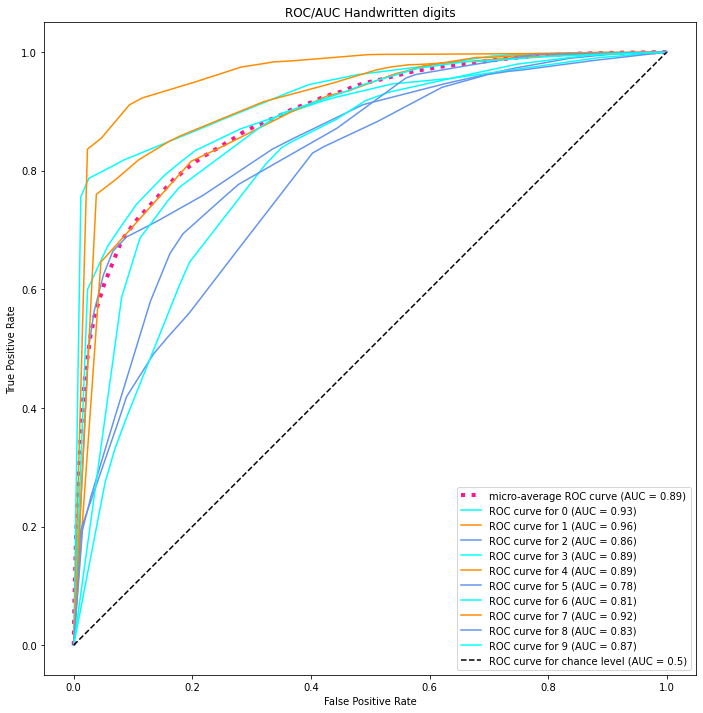

In [14]:
class_names = [str(i) for i in range(10)]   
title = "ROC/AUC Handwritten digits"
draw_multiclass_roc_auc(clf,y_test_mnist,x_test_mnist,class_names,title)

<span style="color:green;font-size:x-large">In summary</span>
<li>The model has about a 60% accuracy (not bad but probably not good enough)</li>
<li>It does better on some digits and not so good on others</li>
<li>Next, we'll see if we can improve on this with the random forest model</li>

<br><br><br>
<h2 style="color:red;font-size:40px">Ensemble learning random forests</h2>
<br><br>


<li>In ensemble learning, the algorithm creates a "forest" of trees</li>
<li>each tree is different, i.e., the trees contain different splits</li>



<span style="color:green;font-size:x-large">Random subspaces</span>
<li>Use a random subset of features and choose the feature to split on from this subset
    <ul>
        <li>Especially useful for our problem since we have so many features</li>
    </ul>
<li>Repeat the process, this gives multiple different trees (the ensemble)
<li>The model then predicts y values by letting the trees vote (if classification) or by taking the average prediction (regression)
<ul>
<li>The forest is given a case
<li>Each tree decides which class the case belongs to
<li>Votes are tallied
<li>The highest vote wins
</ul>

In [15]:
from sklearn.ensemble import RandomForestClassifier

#n_estimators is the number of trees in the forest. We'll generate 10 trees that will vote on the classification
rf_clf = RandomForestClassifier(n_estimators=10)
#np.ravel flattens the pandas Series into an np array. That's what the classifier needs
rf_clf.fit(x_train_mnist,np.ravel(y_train_mnist))

RandomForestClassifier(n_estimators=10)

<span style="color:green;font-size:x-large">Accuracy and Precision</span>
<p></p>
<li>A dramatic improvement in accuracy and precision!</li>
<li>Random forests generally work well!</li>

In [16]:
print("train accuracy:", rf_clf.score(x_train_mnist,y_train_mnist))
print("test accuracy :", rf_clf.score(x_test_mnist,y_test_mnist))

train accuracy: 0.9991224489795918
test accuracy : 0.9492857142857143


In [17]:
from sklearn.metrics import precision_score
precision_score(y_test_mnist,rf_clf.predict(x_test_mnist),average="weighted")

0.9493459769408565

<br><br><br>
<span style="color:red;font-size:50px">Bagging</span>
<br><br>



<li><span style="color:blue">Bagging</span> in machine learning involves resampling subsets of the data to build a model</li>
<li>Create a synthetic dataset by drawing sample cases "with replacement"</li>
<li>Run the decision tree algorithm on this dataset</li>
<li>Repeat on a new synthetic datasets</li>
<li>Let the many trees vote on the class for each case</li>
<li>Bootstrapping is especially useful when there is missing data in the dataset</li>
<li>The sklearn model <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html">BaggingClassifier</a> provides bootstrapping for random forests</li>


<li>One major advantage of bagging is that, since you're using multiple different subsets of the data, you're more likely to reduce the variance of your model (i.e., the out of sample variance)</li>
<li>bagging is particularly useful when you have many "weak learners". The combined effect is a generally a strong learner</li>

In [36]:
%%time
from sklearn.ensemble import BaggingClassifier #for bootstrapping
bag_clf = BaggingClassifier(n_estimators=20,max_samples=0.8,max_features=0.8,n_jobs=-1)
bag_clf.fit(x_train_mnist,np.ravel(y_train_mnist))

CPU times: user 37.8 s, sys: 2.65 s, total: 40.4 s
Wall time: 58.7 s


BaggingClassifier(max_features=0.8, max_samples=0.8, n_estimators=20, n_jobs=-1)

In [38]:
print(len(bag_clf.estimators_samples_[0]))
print(len(bag_clf.estimators_features_[0]))


39200
626


<span style="color:green;font-size:x-large">Accuracy and Precision</span>

In [39]:
print("train accuracy:", bag_clf.score(x_train_mnist,y_train_mnist))
print("test accuracy :", bag_clf.score(x_test_mnist,y_test_mnist))

"""RESULT
"""

/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


train accuracy: 0.9988571428571429
test accuracy : 0.9555238095238096


In [40]:
from sklearn.metrics import precision_score
precision_score(y_test_mnist,bag_clf.predict(x_test_mnist),average="weighted")

0.9555213310345743

<p></p>
<span style="color:green;font-size:x-large">Hyperparameters vs. model parameters</span>
<p></p>
<li>In machine learning, a <span style="color:blue">model parameter</span> is something that is estimated from the data by the model. These are what we're looking for when we train a model. For example, the coefficients of a regression equation (or the weights in a neural network) are model parameters. The split values in a decision tree are another example of a model parameters</li>
<li>In our bagging model, we generated 10 trees using 80% of the features and 80% of the data (with replacement). These parameters are external to the model. I.e., they cannot be estimated from the data but must be tuned externally</li>
<li>Parameters that are used to tune the learning model are known as <span style="color:blue">hyperparameters</span></li>
<li>Hyperparameter tuning is an important part (art!) in ML</li>


<span style="color:green;font-size:x-large">Hyperparameter estimation through grid search</span>
<p></p>
<li>The process of figuring out the right combination of hyperparameters is known as <span style="color:blue">hyperparameter tuning</span></li>
<li>To avoid the danger of overfitting, tuning is usually done by running many different combinations of hyperparameter values in a cross validation framework</li>
<li>sklearn provides <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html">GridSearcCV</a> to search through the hyperparameter space</li>


<span style="color:green;font-size:x-large">Gridsearch output</span>
<li>Note the time for each cv run. As the number of estimators go up, the time goes up</li>
<li>Total time on my machine: 16 minutes</li>
<pre>
Fitting 7 folds for each of 12 candidates, totalling 84 fits
[CV 1/7] END max_features=0.6, max_samples=0.6, n_estimators=10;, score=0.940 total time=  25.0s
[CV 4/7] END max_features=0.6, max_samples=0.6, n_estimators=20;, score=0.956 total time=  54.2s
/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[CV 2/7] END max_features=0.6, max_samples=0.6, n_estimators=10;, score=0.937 total time=  24.9s
[CV 5/7] END max_features=0.6, max_samples=0.6, n_estimators=20;, score=0.950 total time=  51.8s
[CV 3/7] END max_features=0.6, max_samples=0.6, n_estimators=10;, score=0.934 total time=  25.4s
[CV 6/7] END max_features=0.6, max_samples=0.6, n_estimators=20;, score=0.957 total time=  51.0s
[CV 4/7] END max_features=0.6, max_samples=0.6, n_estimators=10;, score=0.935 total time=  25.8s
[CV 7/7] END max_features=0.6, max_samples=0.6, n_estimators=20;, score=0.952 total time=  52.1s
[CV 5/7] END max_features=0.6, max_samples=0.6, n_estimators=10;, score=0.936 total time=  28.1s
[CV 1/7] END max_features=0.6, max_samples=0.6, n_estimators=40;, score=0.955 total time= 1.8min
[CV 6/7] END max_features=0.6, max_samples=0.6, n_estimators=10;, score=0.943 total time=  28.4s
[CV 2/7] END max_features=0.6, max_samples=0.6, n_estimators=40;, score=0.954 total time= 1.8min
[CV 7/7] END max_features=0.6, max_samples=0.6, n_estimators=10;, score=0.940 total time=  28.7s
[CV 3/7] END max_features=0.6, max_samples=0.6, n_estimators=40;, score=0.950 total time= 1.8min
[CV 1/7] END max_features=0.6, max_samples=0.8, n_estimators=10;, score=0.939 total time=  43.8s
[CV 4/7] END max_features=0.6, max_samples=0.8, n_estimators=10;, score=0.940 total time=  37.9s
[CV 3/7] END max_features=0.6, max_samples=0.8, n_estimators=10;, score=0.940 total time=  35.5s
[CV 5/7] END max_features=0.6, max_samples=0.8, n_estimators=10;, score=0.942 total time=  34.8s
[CV 2/7] END max_features=0.6, max_samples=0.6, n_estimators=20;, score=0.950 total time=  51.7s
[CV 5/7] END max_features=0.6, max_samples=0.6, n_estimators=40;, score=0.954 total time= 1.8min
[CV 3/7] END max_features=0.6, max_samples=0.6, n_estimators=20;, score=0.943 total time=  51.7s
[CV 6/7] END max_features=0.6, max_samples=0.6, n_estimators=40;, score=0.958 total time= 1.7min
[CV 2/7] END max_features=0.6, max_samples=0.8, n_estimators=10;, score=0.940 total time=  42.7s
[CV 6/7] END max_features=0.6, max_samples=0.8, n_estimators=10;, score=0.943 total time=  35.9s
[CV 1/7] END max_features=0.6, max_samples=0.6, n_estimators=20;, score=0.950 total time=  56.1s
[CV 4/7] END max_features=0.6, max_samples=0.6, n_estimators=40;, score=0.955 total time= 1.8min
[CV 4/7] END max_features=0.6, max_samples=0.8, n_estimators=20;, score=0.954 total time= 1.1min
[CV 5/7] END max_features=0.6, max_samples=0.8, n_estimators=20;, score=0.950 total time= 1.1min
[CV 1/7] END max_features=0.8, max_samples=0.6, n_estimators=10;, score=0.939 total time=  50.2s
[CV 6/7] END max_features=0.6, max_samples=0.8, n_estimators=20;, score=0.953 total time= 1.1min
[CV 2/7] END max_features=0.8, max_samples=0.6, n_estimators=10;, score=0.931 total time=  49.8s
[CV 7/7] END max_features=0.6, max_samples=0.8, n_estimators=20;, score=0.956 total time= 1.3min
[CV 3/7] END max_features=0.8, max_samples=0.6, n_estimators=10;, score=0.929 total time=  45.5s
[CV 7/7] END max_features=0.6, max_samples=0.8, n_estimators=10;, score=0.944 total time=  38.9s
[CV 2/7] END max_features=0.6, max_samples=0.8, n_estimators=40;, score=0.956 total time= 2.3min
[CV 7/7] END max_features=0.6, max_samples=0.6, n_estimators=40;, score=0.958 total time= 1.9min
[CV 3/7] END max_features=0.6, max_samples=0.8, n_estimators=40;, score=0.952 total time= 2.4min
[CV 1/7] END max_features=0.6, max_samples=0.8, n_estimators=20;, score=0.954 total time= 1.1min
[CV 4/7] END max_features=0.6, max_samples=0.8, n_estimators=40;, score=0.958 total time= 2.3min
[CV 2/7] END max_features=0.6, max_samples=0.8, n_estimators=20;, score=0.953 total time= 1.1min
[CV 5/7] END max_features=0.6, max_samples=0.8, n_estimators=40;, score=0.955 total time= 2.3min
[CV 3/7] END max_features=0.6, max_samples=0.8, n_estimators=20;, score=0.947 total time= 1.1min
[CV 6/7] END max_features=0.6, max_samples=0.8, n_estimators=40;, score=0.959 total time= 2.2min
[CV 1/7] END max_features=0.6, max_samples=0.8, n_estimators=40;, score=0.960 total time= 2.3min
[CV 1/7] END max_features=0.8, max_samples=0.6, n_estimators=20;, score=0.948 total time= 1.2min
[CV 4/7] END max_features=0.8, max_samples=0.6, n_estimators=10;, score=0.936 total time=  38.1s
[CV 3/7] END max_features=0.8, max_samples=0.6, n_estimators=20;, score=0.938 total time= 1.3min
[CV 5/7] END max_features=0.8, max_samples=0.6, n_estimators=10;, score=0.940 total time=  42.1s
[CV 4/7] END max_features=0.8, max_samples=0.6, n_estimators=20;, score=0.946 total time= 1.2min
[CV 6/7] END max_features=0.8, max_samples=0.6, n_estimators=10;, score=0.939 total time=  41.6s
[CV 6/7] END max_features=0.8, max_samples=0.6, n_estimators=20;, score=0.949 total time= 1.2min
[CV 5/7] END max_features=0.8, max_samples=0.6, n_estimators=20;, score=0.948 total time= 1.2min
[CV 1/7] END max_features=0.8, max_samples=0.8, n_estimators=10;, score=0.942 total time=  46.1s
[CV 7/7] END max_features=0.8, max_samples=0.6, n_estimators=20;, score=0.949 total time= 1.2min
[CV 3/7] END max_features=0.8, max_samples=0.8, n_estimators=10;, score=0.934 total time=  58.6s
[CV 7/7] END max_features=0.6, max_samples=0.8, n_estimators=40;, score=0.957 total time= 2.2min
[CV 3/7] END max_features=0.8, max_samples=0.6, n_estimators=40;, score=0.946 total time= 2.5min
[CV 7/7] END max_features=0.8, max_samples=0.6, n_estimators=10;, score=0.940 total time=  38.0s
[CV 1/7] END max_features=0.8, max_samples=0.6, n_estimators=40;, score=0.953 total time= 2.4min
[CV 7/7] END max_features=0.8, max_samples=0.8, n_estimators=10;, score=0.936 total time=  47.1s
[CV 2/7] END max_features=0.8, max_samples=0.6, n_estimators=40;, score=0.948 total time= 2.5min
[CV 1/7] END max_features=0.8, max_samples=0.8, n_estimators=20;, score=0.948 total time= 1.5min
[CV 4/7] END max_features=0.8, max_samples=0.8, n_estimators=10;, score=0.938 total time=  51.2s
[CV 3/7] END max_features=0.8, max_samples=0.8, n_estimators=20;, score=0.945 total time= 1.5min
[CV 2/7] END max_features=0.8, max_samples=0.8, n_estimators=10;, score=0.930 total time=  58.6s
[CV 5/7] END max_features=0.8, max_samples=0.8, n_estimators=10;, score=0.936 total time=  47.5s
[CV 4/7] END max_features=0.8, max_samples=0.8, n_estimators=20;, score=0.948 total time= 1.5min
[CV 4/7] END max_features=0.8, max_samples=0.6, n_estimators=40;, score=0.951 total time= 2.4min
[CV 5/7] END max_features=0.8, max_samples=0.8, n_estimators=20;, score=0.949 total time= 1.5min
[CV 2/7] END max_features=0.8, max_samples=0.6, n_estimators=20;, score=0.947 total time= 1.2min
[CV 5/7] END max_features=0.8, max_samples=0.6, n_estimators=40;, score=0.954 total time= 2.4min
[CV 6/7] END max_features=0.8, max_samples=0.8, n_estimators=20;, score=0.952 total time= 1.5min
[CV 6/7] END max_features=0.8, max_samples=0.8, n_estimators=10;, score=0.943 total time=  53.4s
[CV 7/7] END max_features=0.8, max_samples=0.8, n_estimators=20;, score=0.952 total time= 1.5min
[CV 6/7] END max_features=0.8, max_samples=0.6, n_estimators=40;, score=0.955 total time= 2.4min
[CV 2/7] END max_features=0.8, max_samples=0.8, n_estimators=40;, score=0.950 total time= 3.0min
[CV 7/7] END max_features=0.8, max_samples=0.6, n_estimators=40;, score=0.956 total time= 2.4min
[CV 3/7] END max_features=0.8, max_samples=0.8, n_estimators=40;, score=0.949 total time= 2.9min
[CV 2/7] END max_features=0.8, max_samples=0.8, n_estimators=20;, score=0.947 total time= 1.5min
[CV 5/7] END max_features=0.8, max_samples=0.8, n_estimators=40;, score=0.954 total time= 2.7min
CPU times: user 4min 58s, sys: 1min 1s, total: 5min 59s
Wall time: 16min
(0.9568163265306123,
 {'max_features': 0.6, 'max_samples': 0.8, 'n_estimators': 40})
</pre>

<span style="color:green;font-size:xx-large">Examine the results</span>
<p></p>
<li>The cv_results_ attribute returns a dictionary of useful results</li>
<li>Each row corresponds to a parameter combination (12 in our example)</li>
<li>Columns tell us the results of each cross validation fold on the test fold</li>
<li>By looking at the results and the parameter shift as the rank increases, we can get some idea of what to explore next</li>



<pre>
	mean_fit_time	std_fit_time	mean_score_time	std_score_time	param_max_features	param_max_samples	param_n_estimators	params	split0_test_score	split1_test_score	split2_test_score	split3_test_score	split4_test_score	split5_test_score	split6_test_score	mean_test_score	std_test_score	rank_test_score
0	26.436759	1.570686	0.180350	0.017108	0.6	0.6	10	{'max_features': 0.6, 'max_samples': 0.6, 'n_e...	0.939714	0.936857	0.934429	0.935143	0.936000	0.943143	0.940000	0.937898	0.002916	10
1	52.470220	1.680127	0.203138	0.028740	0.6	0.6	20	{'max_features': 0.6, 'max_samples': 0.6, 'n_e...	0.950429	0.950000	0.943000	0.955571	0.950000	0.957286	0.951857	0.951163	0.004264	6
2	106.841716	2.929984	0.238757	0.019672	0.6	0.6	40	{'max_features': 0.6, 'max_samples': 0.6, 'n_e...	0.955000	0.953714	0.949714	0.954857	0.953714	0.958143	0.958286	0.954776	0.002715	2
3	38.270749	3.289352	0.214992	0.045783	0.6	0.8	10	{'max_features': 0.6, 'max_samples': 0.8, 'n_e...	0.938571	0.939857	0.939857	0.940143	0.942143	0.943286	0.944286	0.941163	0.001941	9
4	67.845399	2.904584	0.217831	0.039327	0.6	0.8	20	{'max_features': 0.6, 'max_samples': 0.8, 'n_e...	0.954143	0.952857	0.946857	0.953571	0.950286	0.953429	0.956286	0.952490	0.002826	4
5	137.847501	3.146549	0.265167	0.034821	0.6	0.8	40	{'max_features': 0.6, 'max_samples': 0.8, 'n_e...	0.960429	0.956143	0.951571	0.957714	0.955143	0.959286	0.957429	0.956816	0.002702	1
6	43.405983	4.654799	0.214100	0.039762	0.8	0.6	10	{'max_features': 0.8, 'max_samples': 0.6, 'n_e...	0.939000	0.931429	0.929286	0.935571	0.939857	0.938857	0.940143	0.936306	0.004048	12
7	73.466744	1.608597	0.232166	0.025948	0.8	0.6	20	{'max_features': 0.8, 'max_samples': 0.6, 'n_e...	0.948429	0.947429	0.938143	0.945857	0.948429	0.948571	0.949000	0.946551	0.003567	8
8	144.541655	2.826865	0.226560	0.031848	0.8	0.6	40	{'max_features': 0.8, 'max_samples': 0.6, 'n_e...	0.952571	0.948286	0.946286	0.951429	0.953571	0.955143	0.955714	0.951857	0.003232	5
9	51.593822	4.903039	0.185936	0.019632	0.8	0.8	10	{'max_features': 0.8, 'max_samples': 0.8, 'n_e...	0.941571	0.930000	0.933857	0.937714	0.936286	0.943286	0.936000	0.936959	0.004163	11
10	89.134779	1.640616	0.215147	0.041693	0.8	0.8	20	{'max_features': 0.8, 'max_samples': 0.8, 'n_e...	0.948143	0.947000	0.944571	0.948143	0.948714	0.951857	0.952143	0.948653	0.002460	7
11	166.907229	8.912953	0.179501	0.005154	0.8	0.8	40	{'max_features': 0.8, 'max_samples': 0.8, 'n_e...	0.956857	0.950429	0.949286	0.955000	0.953571	0.953143	0.956286	0.953510	0.002635	3
</pre>

<span style="color:green;font-size:x-large">Evaluating the best model</span>
<p></p>
<li>The gridsearch best model used cross validation on the training dataset</li>
<li>We can run the best model on the entire training dataset and test it against the testing dataset</li>

<br><br><br>
<span style="color:red;font-size:50px">Gradient Boosting</span>
<br><br>


In gradient boosting, the algorithm starts with a randomly generated tree that predicts the y values and then iteratively generates trees that predict the error 

A simplistic explanation is as follows:
<li>set metaparameters (num features and sample size)</li>
<li>build a tree (using the feature subset and sample subset)</li>
<li>for that tree, compute the error for each case in the sample (or for another random sample)</li>
<li>we now have data in the format (independent features, prediction error)</li>
<li>build a tree that predicts the prediction error (after applying a regularization factor to reduce overfitting)</li>
<li>combine the original tree and the error predicting tree (after applying a second "error correcting factor"</li>
<li>this combination gives us prediction model 1</li>
<li>recalculate errors and build a new error prediction tree</li>
<li>combine with model1 to give model 2</li>
<li>Do this for n iterations</li>


<img src="gradient boosting.png">

<li>Gradient boosting is computationally expensive but, in most cases, gives better results</li>

<span style="color:green;font-size:xx-large">Feature importance</span>
<p></p>
<li>Since ensemble methods are picking different features in different trees, they can provide us with an estimate of feature importance</li>
<li>For each feature, the model calculates by how much entropy decreases (net across levels) by selecting it</li>

<li>the digit recognition features are not informative so we'll use our wine example to examine feature importance</li>

In [54]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
import pandas as pd
from pandas import DataFrame
w_df = pd.read_csv(url,header=0,sep=';')


In [55]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(w_df, test_size = 0.3)
x_train_wine = train.iloc[0:,0:11]
y_train_wine = train[['quality']]
x_test_wine = test.iloc[0:,0:11]
y_test_wine = test[['quality']]




In [56]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(max_depth=5)
rf_model.fit(x_train_wine,np.ravel(y_train_wine))

RandomForestRegressor(max_depth=5)

In [57]:
rf_model.score(x_train_wine,y_train_wine)

0.549257426450366

In [58]:
rf_model.score(x_test_wine,y_test_wine)

0.42185133251450835

<span style="color:green;font-size:large">plotting relative importance of features</span>

In [59]:
rf_model.feature_importances_

array([0.03, 0.14, 0.02, 0.02, 0.03, 0.03, 0.06, 0.03, 0.03, 0.20, 0.42])

Text(0.5, 0, 'Relative Importance')

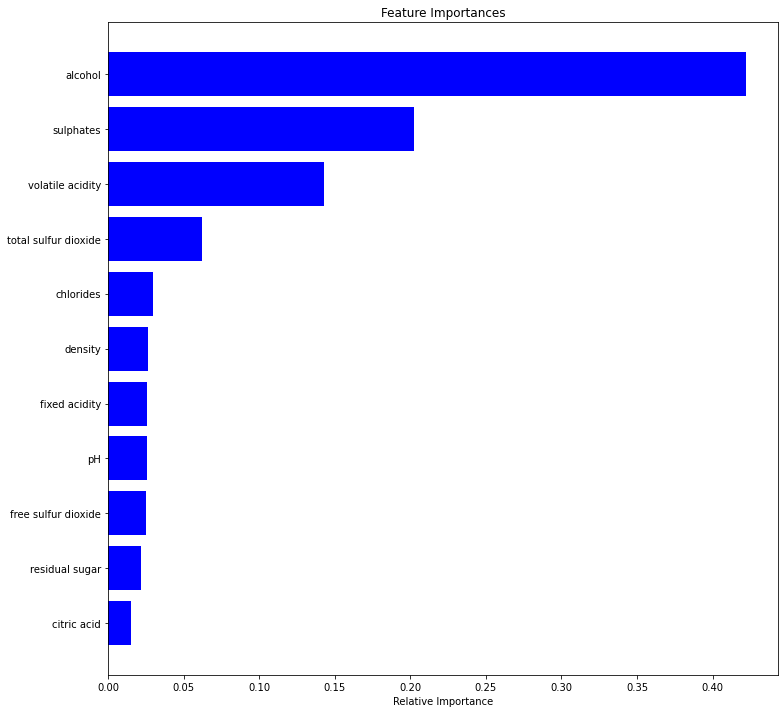

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
labels = x_train_wine.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices],  color='b', align='center')
plt.yticks(range(len(indices)),labels[indices])

plt.xlabel('Relative Importance')

